In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import random
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
data=pd.read_csv('top_200_password_2020_by_country.csv')
data

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds
0,au,Australia,1,123456,308483,< 1 second,1.0,0
1,au,Australia,2,password,191880,< 1 second,5.0,0
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800
3,au,Australia,4,password1,86884,< 1 second,16.0,0
4,au,Australia,5,123456789,75856,< 1 second,2.0,0
...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200


In [3]:
print(sorted(data['Time_to_crack_in_seconds'].unique().tolist()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 26, 28, 29, 30, 32, 33, 34, 35, 36, 37, 41, 42, 43, 45, 46, 47, 51, 52, 55, 59, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 960, 1020, 1440, 1560, 1620, 1740, 2160, 2580, 2640, 2940, 3000, 3120, 3600, 7200, 10800, 14400, 21600, 32400, 39600, 43200, 50400, 54000, 57600, 61200, 68400, 79200, 82800, 86400, 172800, 259200, 345600, 432000, 518400, 604800, 950400, 1036800, 2332800, 5356800, 8035200, 10713600, 13392000, 16070400, 26784000, 32140800, 96422400, 128563200, 160704000, 514252800, 996364800, 1221350400, 3214080000]


In [4]:
print(sorted(data['Password'][data['Time_to_crack_in_seconds']==0].unique().tolist()))

['000000', '100100', '10101', '101010', '10101010', '10203', '102030', '10203040', '102938', '1029384756', '1111', '11111', '111111', '1111111', '11111111', '1111111111', '111111a', '11112222', '111222', '112112', '112233', '11223344', '1122334455', '11235813', '1123581321', '112421', '12012', '120120', '121121', '1212', '121212', '12121212', '121234', '121314', '122333', '123', '12301230', '123123', '12312312', '123123123', '123123a', '12321', '123321', '123321123', '1234', '12341234', '1234321', '12344321', '12345', '123451', '1234512345', '123454321', '1234554321', '123456', '1234567', '12345678', '123456789', '1234567890', '1234567891', '12345678910', '123456789a', '12345679', '123456a', '123456qwe', '123456qwerty', '12345a', '12345qwert', '1234abcd', '1234qwer', '123654', '123654789', '12369874', '123698745', '123789', '123789456', '123987', '123abc', '123asd', '123qaz', '123qwe', '123qwe123', '123qweasd', '123qweasdzxc', '124578', '12qw34er', '12qwaszx', '131313', '132435', '1346

In [5]:
print(sorted(data['Password'][data['Time_to_crack_in_seconds']==3214080000].unique().tolist()))

['estantevirtual', 'kallynlavallee', 'omarbelmestour']


In [6]:
data['safety']=data['Time_to_crack_in_seconds'].apply(lambda x: int(np.log(x+1)/5))
data['safety'].value_counts()

0    7309
1    1974
2     438
3      68
4      11
Name: safety, dtype: int64

In [7]:
data2=data[['Password','safety']]
data2

,Password,safety
0,123456,0
1,password,0
2,lizottes,1
3,password1,0
4,123456789,0
...,...,...
9795,hongngoc,1
9796,anhtien,1
9797,lanhuong,1
9798,congacon,1


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Password  9800 non-null   object
 1   safety    9800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 153.2+ KB


In [9]:
data2a=data2[data2['safety']==0]
data2b=data2[data2['safety']==1]
data2c=data2[data2['safety']==2]
data2d=data2[data2['safety']==3]
data2e=data2[data2['safety']==4]
data3=[data2a,data2b,data2c,data2d,data2e,]

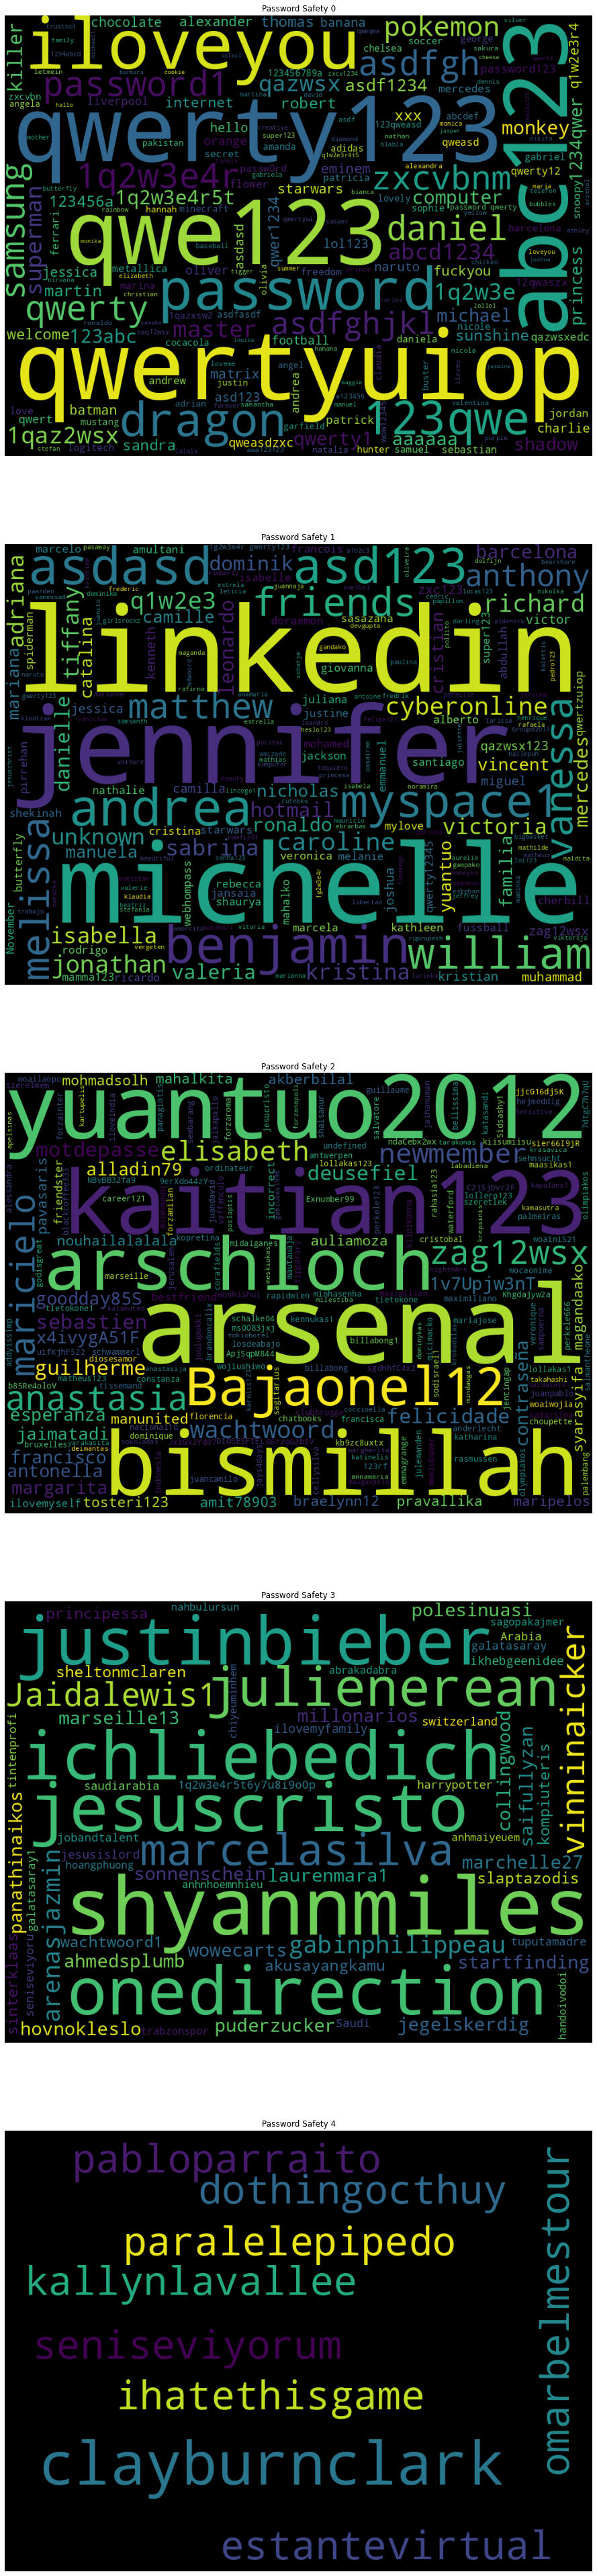

In [10]:
fig,axs = plt.subplots(5,1,figsize=(40,70))
for i in range(5):
    r=i
    random.seed(2021)
    random.shuffle(data3[i]['Password'].tolist())
    wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(data3[i]['Password'].tolist()))    
    ax=axs[r].axis("off")  
    ax=axs[r].set_title('Password Safety '+str(i))
    ax=axs[r].imshow(wordcloud)
plt.show()